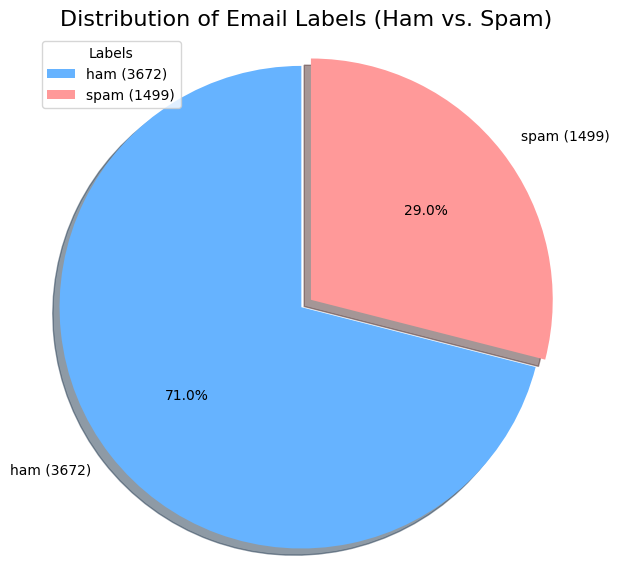

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
✅ Accuracy: 0.9710144927536232

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       742
        Spam       0.95      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
data = pd.read_csv("spam_ham_dataset.csv")

import matplotlib.pyplot as plt

# Count the occurrences of each label ('ham' and 'spam')
label_counts = data['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    label_counts,
    labels=label_counts.index + ' (' + label_counts.astype(str) + ')', # Add counts to labels
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    shadow=True,
    explode=(0, 0.05) # "Explode" the spam slice slightly
)
plt.title('Distribution of Email Labels (Ham vs. Spam)', fontsize=16)
plt.axis('equal') # Ensures the pie chart is a perfect circle
plt.legend(title="Labels", loc="best")
plt.show()

# Inspect dataset
print(data.head())

# Usually dataset has 'text' column and 'label' (ham/spam)
X = data['text']
y = data['label_num']

# 2. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Convert text into numerical vectors
vectorizer = CountVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 5. Predictions
y_pred = model.predict(X_test_vec)

# 6. Performance Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))